In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
data = pd.read_csv('housing.csv')

In [138]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [139]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value'] 

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) 

In [141]:
train_data = X_train.join(Y_train)

In [142]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16142,-122.46,37.77,52.0,3193.0,688.0,2099.0,681.0,3.9375,NEAR BAY,402900.0
18327,-122.15,37.46,52.0,1803.0,257.0,683.0,259.0,10.9508,NEAR BAY,500001.0
11989,-117.52,33.99,14.0,13562.0,2057.0,7600.0,2086.0,5.2759,INLAND,182900.0
16076,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,NEAR OCEAN,314300.0
11092,-117.87,33.81,15.0,3082.0,536.0,1268.0,531.0,3.7604,<1H OCEAN,280100.0
...,...,...,...,...,...,...,...,...,...,...
12779,-121.42,38.65,21.0,2274.0,495.0,1157.0,445.0,2.0980,INLAND,49800.0
9176,-118.54,34.38,18.0,2096.0,309.0,1044.0,328.0,6.8299,<1H OCEAN,262100.0
16894,-122.38,37.58,52.0,2039.0,299.0,772.0,303.0,6.4710,NEAR OCEAN,500001.0
6665,-118.09,34.17,36.0,2875.0,552.0,1131.0,458.0,4.3083,INLAND,269300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

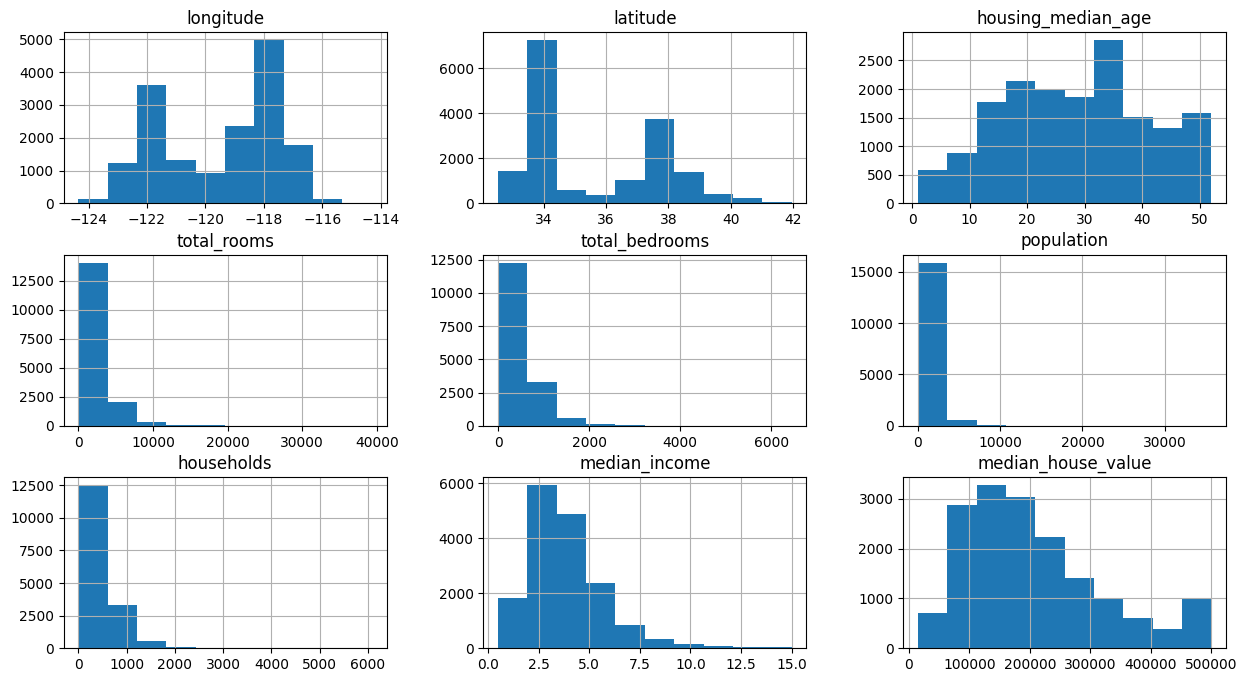

In [143]:
train_data.hist(figsize=(15,8))

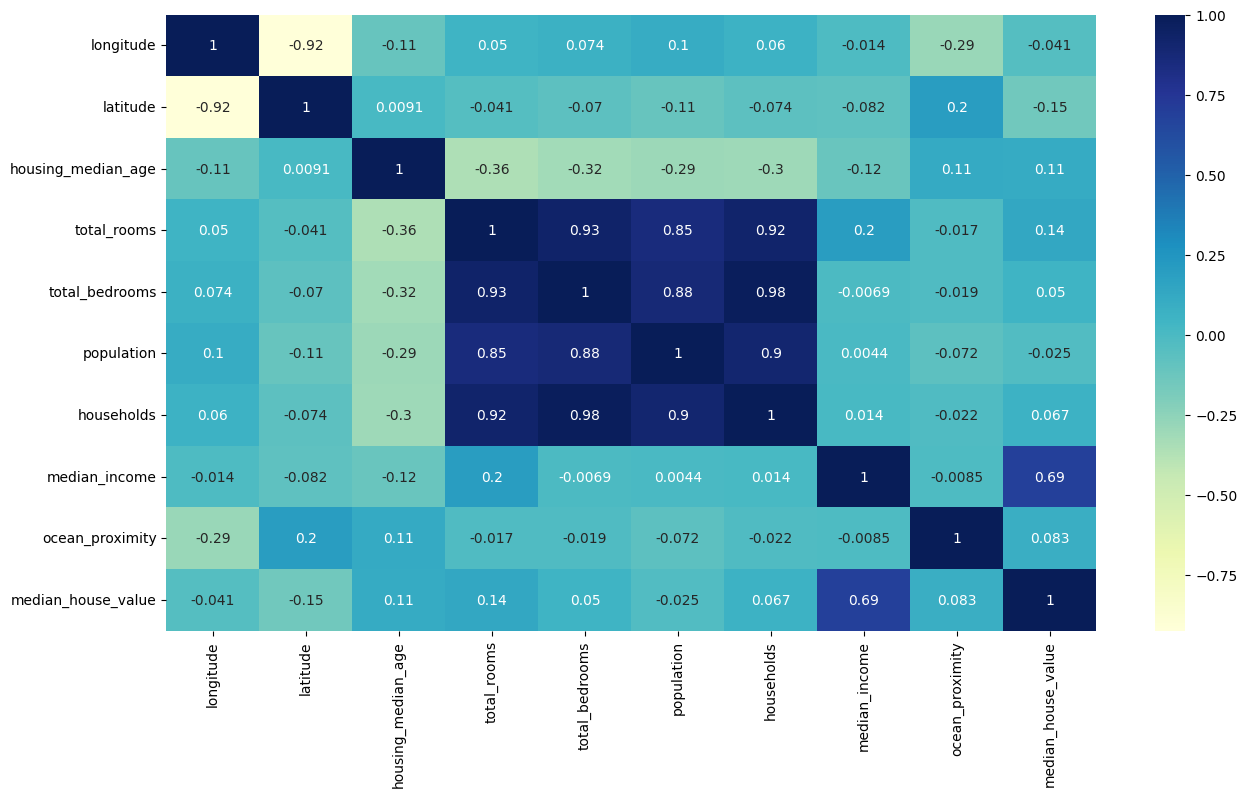

In [144]:
train_data['ocean_proximity'] = train_data['ocean_proximity'].astype('category').cat.codes

correlation_matrix = train_data.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [145]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'ocean_proximity'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

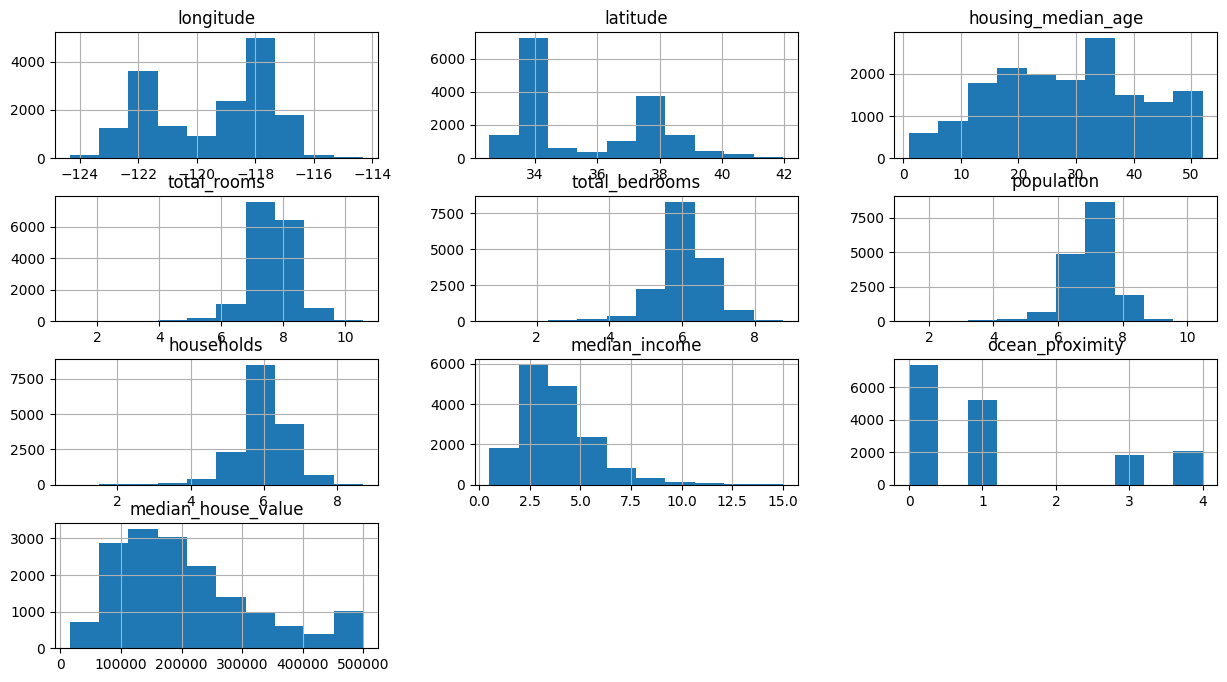

In [146]:
train_data.hist(figsize=(15, 8))

In [147]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

In [148]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,0,1,2,3,4
16142,-122.46,37.77,52.0,8.069029,6.535241,7.649693,6.525030,3.9375,402900.0,False,False,False,True,False
18327,-122.15,37.46,52.0,7.497762,5.552960,6.527958,5.560682,10.9508,500001.0,False,False,False,True,False
11989,-117.52,33.99,14.0,9.515101,7.629490,8.936035,7.643483,5.2759,182900.0,False,True,False,False,False
16076,-122.48,37.74,52.0,7.681099,6.049733,6.978214,5.916202,4.1310,314300.0,False,False,False,False,True
11092,-117.87,33.81,15.0,8.033658,6.285998,7.145984,6.276643,3.7604,280100.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12779,-121.42,38.65,21.0,7.729735,6.206576,7.054450,6.100319,2.0980,49800.0,False,True,False,False,False
9176,-118.54,34.38,18.0,7.648263,5.736572,6.951772,5.796058,6.8299,262100.0,True,False,False,False,False
16894,-122.38,37.58,52.0,7.620705,5.703782,6.650279,5.717028,6.4710,500001.0,False,False,False,False,True
6665,-118.09,34.17,36.0,7.964156,6.315358,7.031741,6.129050,4.3083,269300.0,False,True,False,False,False


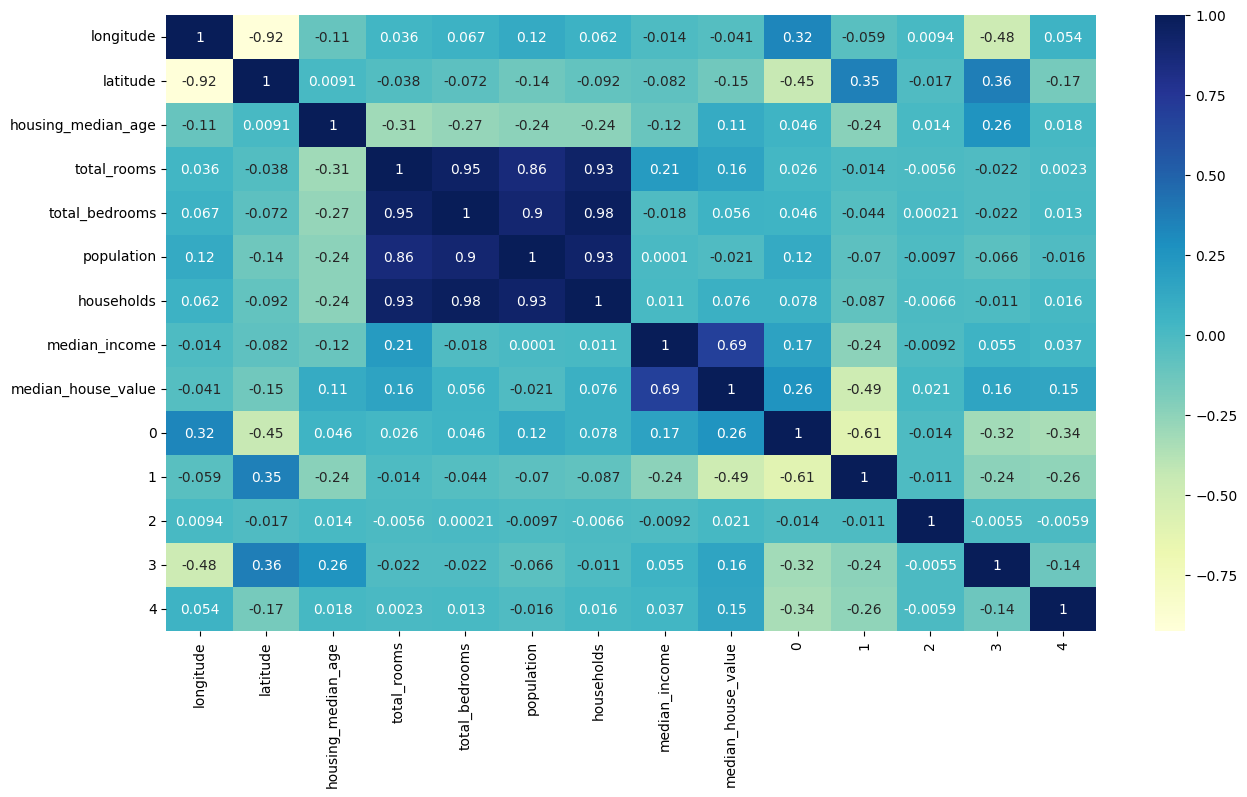

In [149]:
correlation_matrix = train_data.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()